# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

Let's start with an example problem statement first, and then move on to working with the admission dataset.

Complete all questions directly in the Jupyter notebook for your assignment. The first part is to help re-familairize yourself with the major concepts, and teh second part is what you will be evaluated on in the rubric for how well you can apply those concepts to a real dataset.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: The outcome is a 'Yes' or 'No' prediction as to whether based on the demographic data will a user become a paying customer.  

#### 2. What are the predictors/covariates? 

Answer: The predictors/covariates are age, gender, location and profession.

#### 3. What timeframe is this data relevent for?

Answer: Jan-Apr 2015

#### 4. What is the hypothesi?

Answer: The hypothesis is that with the provided demographic information one can predict to x% (e.g. 90%) certainty whether or not a free-tier user will become a paying customer.

## Let's get started with our dataset

#### 1. Create a data dictionary 

Variable | Description | Type of Variable
---| ---| ---
admit | admitted = 1 not = 0 | categorical
gre | GRE score | continuous
gpa | Grade Point Average | continuous
rank | alma mater rank from 1 (highest) to 4 (lowest) | categorical


We would like to explore the association between X and Y 

#### 2. What is the outcome of interest?

Answer: Will a candidate will be admitted or not.

#### 3. What are the predictors and vairables you want to control for (covariates)? 

Answer: GRE scores, GPA and undergraduate alma mater ranking.

#### 4. What timeframe is this data relevent for?

Answer: The timeframe is not defined.

#### 4. What is the hypothesis?

Answer: Given a candidate's GRE score, GPA and undergraduate school we can predict whether the person will get admitted to the UCLA program.

    Using the above information, write a well-formed problem statement using variables of your choice. 


## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: The goal of exloratory analysis is to gain insight into your data.  In doing so you will identify variables/predictors, locate outliers and missing values, and formulate and test assumptions.

#### 2a. How will you examine for and handle the presence of missing data ?

Answer:  First, I will use .info() to determine the size of the overall data and which variables contain missing values as well as how many are missing.  Next I will use the nearest neighbors to determine the one missing prestige value.  Finally, I will use LinearRegression() to fill in the 2 missing GRE and 2 missing GPA values. (Note: I attempted to apply these methods but ran into difficulty.  I believe the issue was with NaN predictor values, e.g. index 187 where both GRE and GPA are NaN.  I tried to get around this by filling in NaN values for GRE with the median in a new column then running regression off that column. However, the same error message appeared: ValueError: ("Input contains NaN, infinity or a value too large for dtype('float64').", u'occurred at index 187'). 

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib; matplotlib.style.use('ggplot')

from pandas import set_option
set_option("display.max_rows", 16)

LARGE_FIGSIZE = (12, 8)

from ipywidgets import interact
%matplotlib inline
import os
os.getcwd()

df = pd.read_csv('admissions.csv')
# print df
df.info()
missing_gre = df['gre'].isnull().sum()
missing_gpa = df['gpa'].isnull().sum()
missing_prestige = df['prestige'].isnull().sum()
print missing_gre
print missing_gpa
print missing_prestige
from sklearn import linear_model, preprocessing

from sklearn.neighbors import KNeighborsRegressor

df['gre_medianimpute'] = df['gre'].fillna(df['gre'].median())
print df.info()
print df.loc[187]
df_complete = df.dropna()
regr = linear_model.LinearRegression()
regr.fit(df_complete[["admit","gre_medianimpute","prestige"]],df_complete['gpa'])

df.loc[:,'gpa'] = df.apply(lambda x: regr.predict(df[["admit","gre_medianimpute","prestige"]])[0] if pd.isnull(x['gpa']) else x['gpa'], axis=1)

#neigh = KNeighborsRegressor(n_neighbors=4)
#neigh.fit(df_complete[["gre","gpa","admit"]], df_complete["prestige"])

#df.loc[:,'prestige_neighborimpute'] = df.apply(lambda x: neigh.predict(df[["gre","gpa","admit"]])[0] if pd.isnull(x['prestige']) else x['prestige'], axis=1)
#df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB
2
2
1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
admit               400 non-null int64
gre                 398 non-null float64
gpa                 398 non-null float64
prestige            399 non-null float64
gre_medianimpute    400 non-null float64
dtypes: float64(4), int64(1)
memory usage: 15.7 KB
None
admit                 0.0
gre                   NaN
gpa                   NaN
prestige              2.0
gre_medianimpute    580.0
Name: 187, dtype: float64


ValueError: ("Input contains NaN, infinity or a value too large for dtype('float64').", u'occurred at index 187')

#### 2b. How will determine the distribution of your data? 

Answer: I will use .hist() to view frequency distributions of all of the variables.

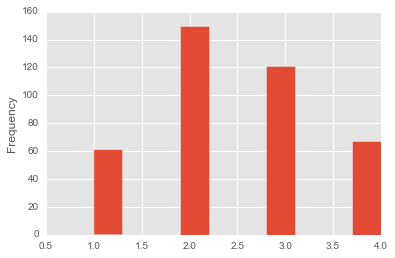

In [66]:
plt.figure();
df["prestige"].plot.hist(alpha=1)
plt.show()
#df['prestige'].hist()

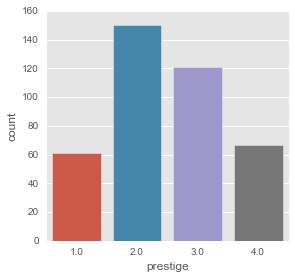

In [57]:
sns.factorplot('prestige',data=df,kind='count')

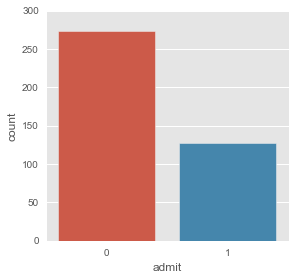

In [56]:
sns.factorplot('admit',data=df,kind='count')

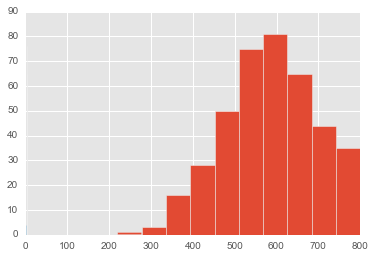

In [53]:
df['gre'].hist()


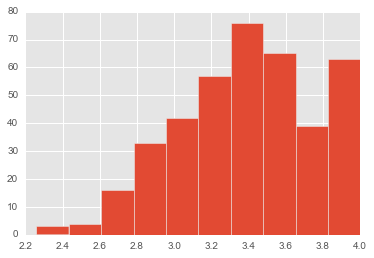

In [54]:
df['gpa'].hist()

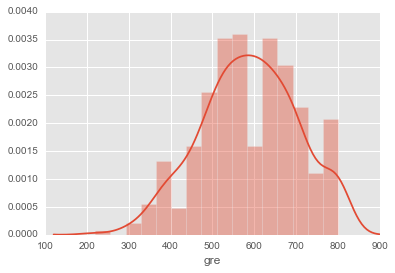

In [50]:
sns.distplot(df['gre'].dropna())


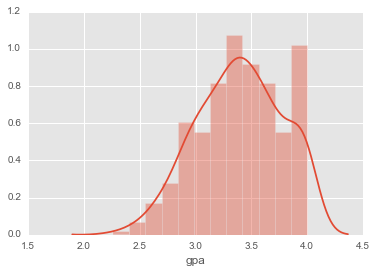

In [51]:
sns.distplot(df['gpa'].dropna())


#### 4b. How will you test for unusually recorded data? 

Answer: I can use .describe() to locate anything that may appear unusual.  Additionally, the histograms offer a way to identify outliers.

In [68]:
df["gre"].describe()
df["gpa"].describe()

count    398.00000
mean       3.39093
std        0.38063
min        2.26000
25%        3.13000
50%        3.39500
75%        3.67000
max        4.00000
Name: gpa, dtype: float64

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: Collect a random sample of 400 UCLA graduate school applications and candidate data.  Make sure to collect values for candidates' GRE scores, GPAs, whether or not the candidate was admitted, and undergraduate school which will be ranked in prestige from 1 (the highest) to 4 (the least prestegious) based on the same categorizational model as previous analyses. For missing GRE and GPA values use LinearRegression() to fill in predicted values.  For missing prestige values, use NearestNeighbors() to fill in predicted values.  Once this data set is complete then the predictive model can be applied.

## Bonus Questions:
1. Write an alternative problem statement for your dataset

Based on the GRE scores, GPAs, and undergraduate school ranking of admitted graduate students predict the level of success measured by graduate class rank or score (whatever metric is available) through the first year.